Importing Necessary Packages

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings


In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X = df.drop(columns=['math score'],axis=1)

In [7]:
y = df['math score']

In [12]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [15]:
X.shape

(1000, 19)

In [17]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    score = r2_score(true, predicted)
    return mae, mse, rmse, score

In [39]:
model_list = []
r2_list = []

for model_name, model in models.items():
    try:
        print(f"Training model: {model_name}")
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_mae, model_train_rmse, model_train_r2, *_ = evaluate_model(y_train, y_train_pred)
        model_test_mae, model_test_rmse, model_test_r2, *_ = evaluate_model(y_test, y_test_pred)

        print(f'Model performance for {model_name} (Training set)')
        print(f'- Root Mean Squared Error: {model_train_rmse:.4f}')
        print(f'- Mean Absolute Error: {model_train_mae:.4f}')
        print(f'- R2 Score: {model_train_r2:.4f}')
        print('---------------------------------')

        print(f'Model performance for {model_name} (Test set)')
        print(f'- Root Mean Squared Error: {model_test_rmse:.4f}')
        print(f'- Mean Absolute Error: {model_test_mae:.4f}')
        print(f'- R2 Score: {model_test_r2:.4f}')
        
        # Append to lists
        model_list.append(model_name)
        r2_list.append(model_test_r2)
        
        print(f'Added to lists: {model_name}, R2: {model_test_r2}')
        print('='*35)
        print('\n')
    except Exception as e:
        print(f'Error with model {model_name}: {e}')

# Create DataFrame and sort
if model_list and r2_list:
    df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])
    print(df.sort_values(by=["R2_Score"], ascending=False))
else:
    print("Model list or R2 list is empty.")


Training model: Linear Regression
Model performance for Linear Regression (Training set)
- Root Mean Squared Error: 28.3808
- Mean Absolute Error: 4.2788
- R2 Score: 5.3274
---------------------------------
Model performance for Linear Regression (Test set)
- Root Mean Squared Error: 29.2638
- Mean Absolute Error: 4.2259
- R2 Score: 5.4096
Added to lists: Linear Regression, R2: 5.40960336750764


Training model: Lasso
Model performance for Lasso (Training set)
- Root Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 6.5938
---------------------------------
Model performance for Lasso (Test set)
- Root Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- R2 Score: 6.5197
Added to lists: Lasso, R2: 6.51969453566742


Training model: Ridge
Model performance for Ridge (Training set)
- Root Mean Squared Error: 28.3378
- Mean Absolute Error: 4.2650
- R2 Score: 5.3233
---------------------------------
Model performance for Ridge (Test set)
- Root Mean Squared Error:

In [41]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
4,Decision Tree,7.897468
3,K_Neighbors Regressor,7.251621
1,Lasso,6.519695
5,XGboost Regressor,6.473307
7,AdaBoost Regressor,6.087411
6,CatBoost Regressor,6.008632
0,Linear Regression,5.409603
2,Ridge,5.390387


In [42]:
Decision = DecisionTreeRegressor()
Decision = Decision.fit(X_train, y_train)
y_pred = Decision.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 75.33


Text(0, 0.5, 'Predicted')

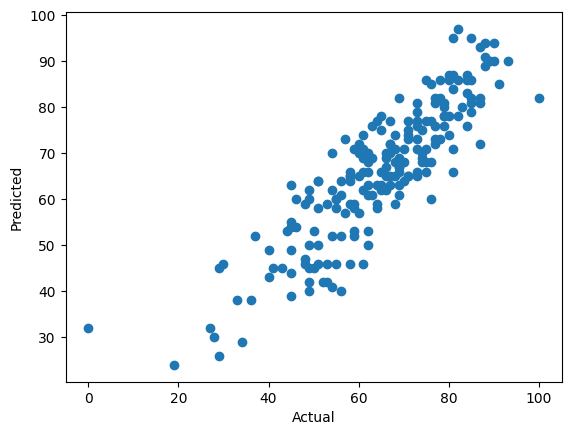

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

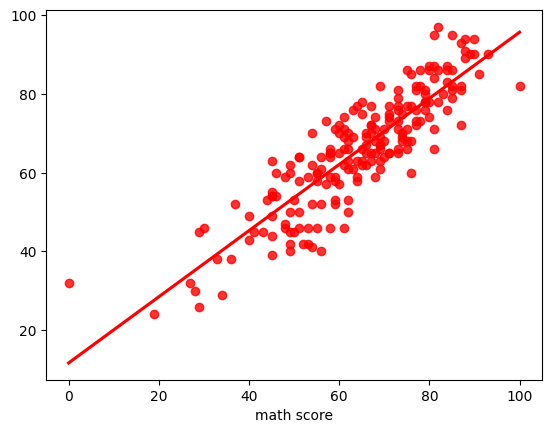

In [44]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [45]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Prediced Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Prediced Value,Difference
521,91,85.0,6.0
737,53,42.0,11.0
740,80,74.0,6.0
660,74,75.0,-1.0
411,84,76.0,8.0
...,...,...,...
408,52,42.0,10.0
332,62,70.0,-8.0
208,74,70.0,4.0
613,65,66.0,-1.0
